# **Time Series Analysis**

In mathematics, a time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

A Time-Series represents a series of time-based orders. It would be Years, Months, Weeks, Days, Horus, Minutes, and Seconds

A time series is an observation from the sequence of discrete-time of successive intervals.

A time series is a running chart.

The time variable/feature is the independent variable and supports the target variable to predict the results.

Time Series Analysis (TSA) is used in different fields for time-based predictions – like Weather Forecasting.

Here, we will do Dataset Visualization For TSA and using ARIMA Model we will predict the weather forecasting.

# **Uploading File**

In [ ]:
from google.colab import files
file = files.upload()

Saving daily-minimum-temperatures-in-mex.csv to daily-minimum-temperatures-in-mex (1).csv


# **Dataset Reading**

In [ ]:
import pandas as pd
data = pd.read_csv('daily-minimum-temperatures-in-mex.csv')
data.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [ ]:
data.tail()

,Date,Daily minimum temperatures
3645,12/27/1990,14.0
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7
3649,12/31/1990,13.0


# **Dataset Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


# **Installing Libraries**

In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install pmdarima
!pip install statsmodels
!pip install statsmodels

# **Dataset Visualization For TSA** 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


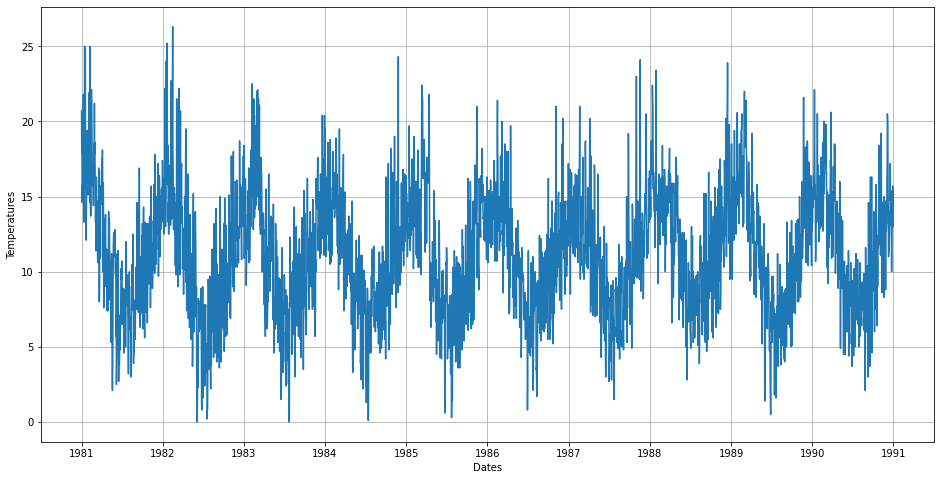

In [ ]:
import matplotlib.pyplot as plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
data = pd.read_csv('daily-minimum-temperatures-in-mex.csv', sep = ',', parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
plt.figure(figsize = (16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Temperatures')
plt.plot(data['Daily minimum temperatures'])

# **Train and Test Dataset**

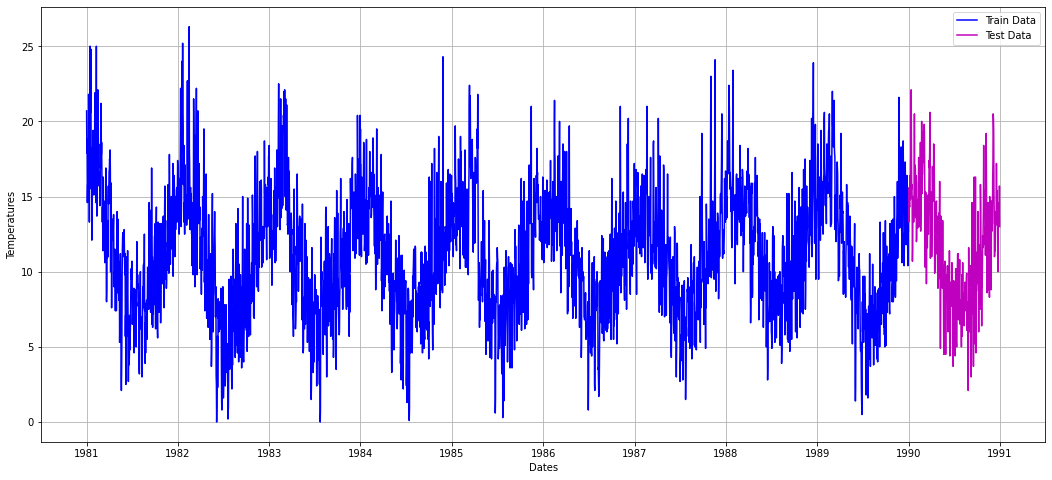

In [ ]:
train_data, test_data = data[0:int(len(data) * 0.9)], data[int(len(data) * 0.9):]
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Temperatures')
plt.plot(train_data['Daily minimum temperatures'], color = 'b', label = 'Train Data')
plt.plot(test_data['Daily minimum temperatures'], color = 'm', label = 'Test Data')
plt.legend()

# **Autoarima Fitting**

In [ ]:
import statsmodels
from pmdarima import auto_arima

stepwise_fit = auto_arima(data['Daily minimum temperatures'], trace = True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16781.136, Time=4.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20611.139, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17265.725, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18554.160, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16816.370, Time=3.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=4.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.222, Time=6.91 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=5.70 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=1.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16779.598, Time=7.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17245.958, Time=1.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17030.851, Time=2.01 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=16781.448, Time=5.20 sec
 ARIMA(3,0,1)(0,0,0

# **ARIMA Model Build** 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data['Daily minimum temperatures'], order = (3, 0, 1))
fitted= model.fit(disp=-1)
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                                  ARMA Model Results                                  
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3285
Model:                             ARMA(3, 1)   Log Likelihood               -7566.026
Method:                               css-mle   S.D. of innovations              2.421
Date:                        Sat, 04 Sep 2021   AIC                          15144.051
Time:                                20:02:20   BIC                          15180.634
Sample:                                     0   HQIC                         15157.149
                                                                                      
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               11.4366      0.893     12.809      0.000       9.687      13.187
a

# **Decomposition**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 1152x576 with 0 Axes>

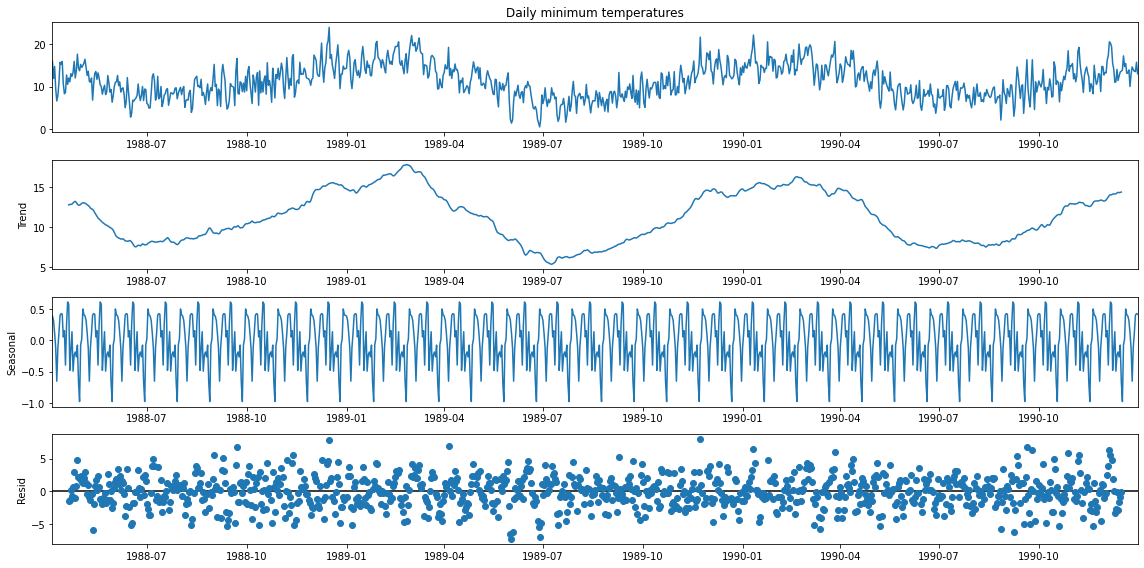

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 16, 8
data_arima = data['Daily minimum temperatures']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model = 'additive', freq = 30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()



# **Prediction Modelling**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_arima = train_data['Daily minimum temperatures']
test_arima = test_data['Daily minimum temperatures']

history = [x for x in train_arima]
y = test_arima

predictions = list()

# Model Buliding
model = ARIMA(history, order = (3,0,1))
model_fit = model.fit(disp = 0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

# Rolling Forecasts
for i in range(1, len(y)):
  # Predict
  model = ARIMA(history, order = (3,0,1 ))
  model_fit = model.fit(disp = 0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # Observations
  obs = y[i]
  history.append(obs)

#Report Performance
mse = mean_squared_error(y,predictions)
print('MSE: ' +str(mse))

mae = mean_absolute_error(y,predictions)
print('MAE: ' +str(mae))

rmse = math.sqrt(mean_squared_error(y,predictions))
print('RMSE:' +str(rmse))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MSE: 5.106384000253132
MAE: 1.7384946799749181
RMSE:2.2597309574931996


# **Visualizing Difference Between Testing and Predictions Dataset**

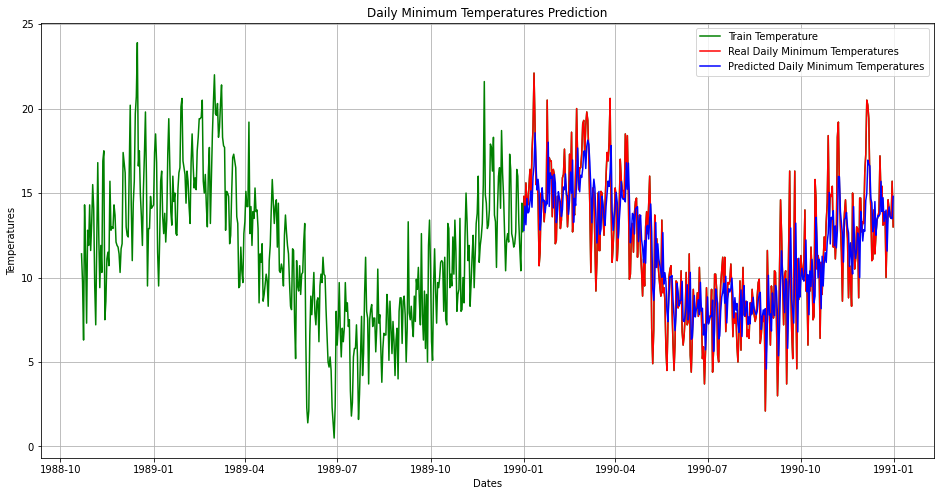

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-800:], data['Daily minimum temperatures'].tail(800), color='green', label = 'Train Temperature')
plt.plot(test_data.index, y, color = 'red', label = 'Real Daily Minimum Temperatures')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Daily Minimum Temperatures')
plt.title('Daily Minimum Temperatures Prediction')
plt.xlabel('Dates')
plt.ylabel('Temperatures')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

# **Predictions**

In [ ]:
predictions

[array([12.7909117]),
 array([14.22814892]),
 array([13.12483342]),
 array([14.67990954]),
 array([13.82216909]),
 array([13.89899281]),
 array([14.54347395]),
 array([15.13108052]),
 array([14.16121429]),
 array([15.94821998]),
 array([16.58059158]),
 array([18.56727863]),
 array([16.65258983]),
 array([15.18065482]),
 array([15.80980805]),
 array([15.09926597]),
 array([12.8063691]),
 array([13.55351411]),
 array([15.31027135]),
 array([14.52949497]),
 array([14.57421252]),
 array([13.84136047]),
 array([14.51616673]),
 array([14.35570004]),
 array([18.0081468]),
 array([14.2078432]),
 array([16.19641879]),
 array([15.89082481]),
 array([15.99796759]),
 array([14.11861302]),
 array([16.11281512]),
 array([15.60054245]),
 array([13.24760443]),
 array([13.73321157]),
 array([15.07870307]),
 array([14.71422884]),
 array([14.47166913]),
 array([13.61351922]),
 array([14.01056927]),
 array([15.35208037]),
 array([15.20058449]),
 array([16.13699254]),
 array([14.89810799]),
 array([14.8450

# **Test Dataset**

In [ ]:
test_data['Daily minimum temperatures']

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Daily minimum temperatures, Length: 365, dtype: float64